In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np   
from os import listdir,  path  
import cv2   
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping   
from keras.models import *
from keras.layers import *
import pandas as pd 

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMG_WIDTH = 512
IMG_HEIGHT = 512

temp = list()
temp1 = list()

images_dir = listdir('/content/drive/MyDrive/Colab_Notebooks/training_images/')
label_dir = listdir('/content/drive/MyDrive/Colab_Notebooks/results/')

for name in label_dir: 
    label_id = name[:-4]  
    if( (str(label_id +'.jpg')) in images_dir): 
        temp.append(str(label_id +'.jpg'))
    if( (str(label_id +'.png')) in images_dir): 
        temp.append(str(label_id +'.png'))

for name in temp: 
    label_id = name[:-4]   
    if( (str(label_id +'.png')) in label_dir): 
        temp1.append(str(label_id +'.png'))

In [4]:
images_dir = temp
label_dir = temp1
images_dir.sort()
label_dir.sort()

test_dir = list()
test_label_dir = list()

test_dir = images_dir[200:220]
test_label_dir = label_dir[200:220]
images_dir = images_dir[0:200]
label_dir = label_dir[0:200] 

In [5]:
y = []
X = []
x_test = []
y_test = []

In [6]:
for file in images_dir: 
    n = images_dir.index(file) 
    path1 = path.join('/content/drive/MyDrive/Colab_Notebooks/training_images/', str(file)) 
    img = cv2.resize(cv2.imread(path1,0),(IMG_WIDTH,IMG_WIDTH)) 
    X.append(img)
    #X.append(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    file2 = label_dir[n]
    path2 = path.join('/content/drive/MyDrive/Colab_Notebooks/results/', str(file2))
    y.append(cv2.resize(cv2.imread(path2,0),(IMG_WIDTH,IMG_WIDTH)))
     
        
    

In [7]:
for file in test_dir: 
    n = test_dir.index(file) 
    path1 = path.join('/content/drive/MyDrive/Colab_Notebooks/training_images/', str(file)) 
    img = cv2.resize(cv2.imread(path1,0),(IMG_WIDTH,IMG_WIDTH)) 
    x_test.append(img)
    #x_test.append(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    file2 = test_label_dir[n]
    path2 = path.join('/content/drive/MyDrive/Colab_Notebooks/results/', str(file2))
    y_test.append(cv2.resize(cv2.imread(path2,0),(IMG_WIDTH,IMG_WIDTH)))

    

In [ ]:
plt.imshow(X[23])

In [ ]:
plt.imshow(y[23])

In [8]:
#np.random.seed(0)
X = np.array(X)
y = np.array(y)
x_test = np.array(x_test)
y_test = np.array(y_test)

X = X.reshape((-1, IMG_WIDTH,IMG_WIDTH, 1))
y = y.reshape((-1, IMG_WIDTH,IMG_WIDTH, 1)) 
test_x = x_test.reshape((-1, IMG_WIDTH,IMG_WIDTH, 1))
test_y = y_test.reshape((-1, IMG_WIDTH,IMG_WIDTH, 1))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)
X_train = X_train/255
y_train = y_train/255
X_valid = X_valid/255
y_valid = y_valid/255
test_x = test_x/255
test_y = test_y/255
del X
del y
del x_test
del y_test

In [11]:
input_img = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1))
 
c1 = Conv2D(16, (3, 3), activation='elu', padding='same') (input_img)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu',padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu',padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

autoencoder = Model(inputs=[input_img], outputs=[outputs])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy' )
 

In [ ]:
checkpointer = ModelCheckpoint(filepath='./weights.best.4.hdf5', 
                               verbose = 1, 
                               save_best_only = True) # verbose =1 is for printing the output

history=autoencoder.fit(X_train,y_train,
                epochs=50, 
                validation_data=(X_valid, y_valid),
                callbacks = [checkpointer])

In [17]:
autoencoder.load_weights("./weights.best.4.hdf5")

In [25]:
tf.keras.models.save_model(autoencoder,'/content/drive/MyDrive/Colab_Notebooks/' )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/assets


In [13]:
autoencoder = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks')

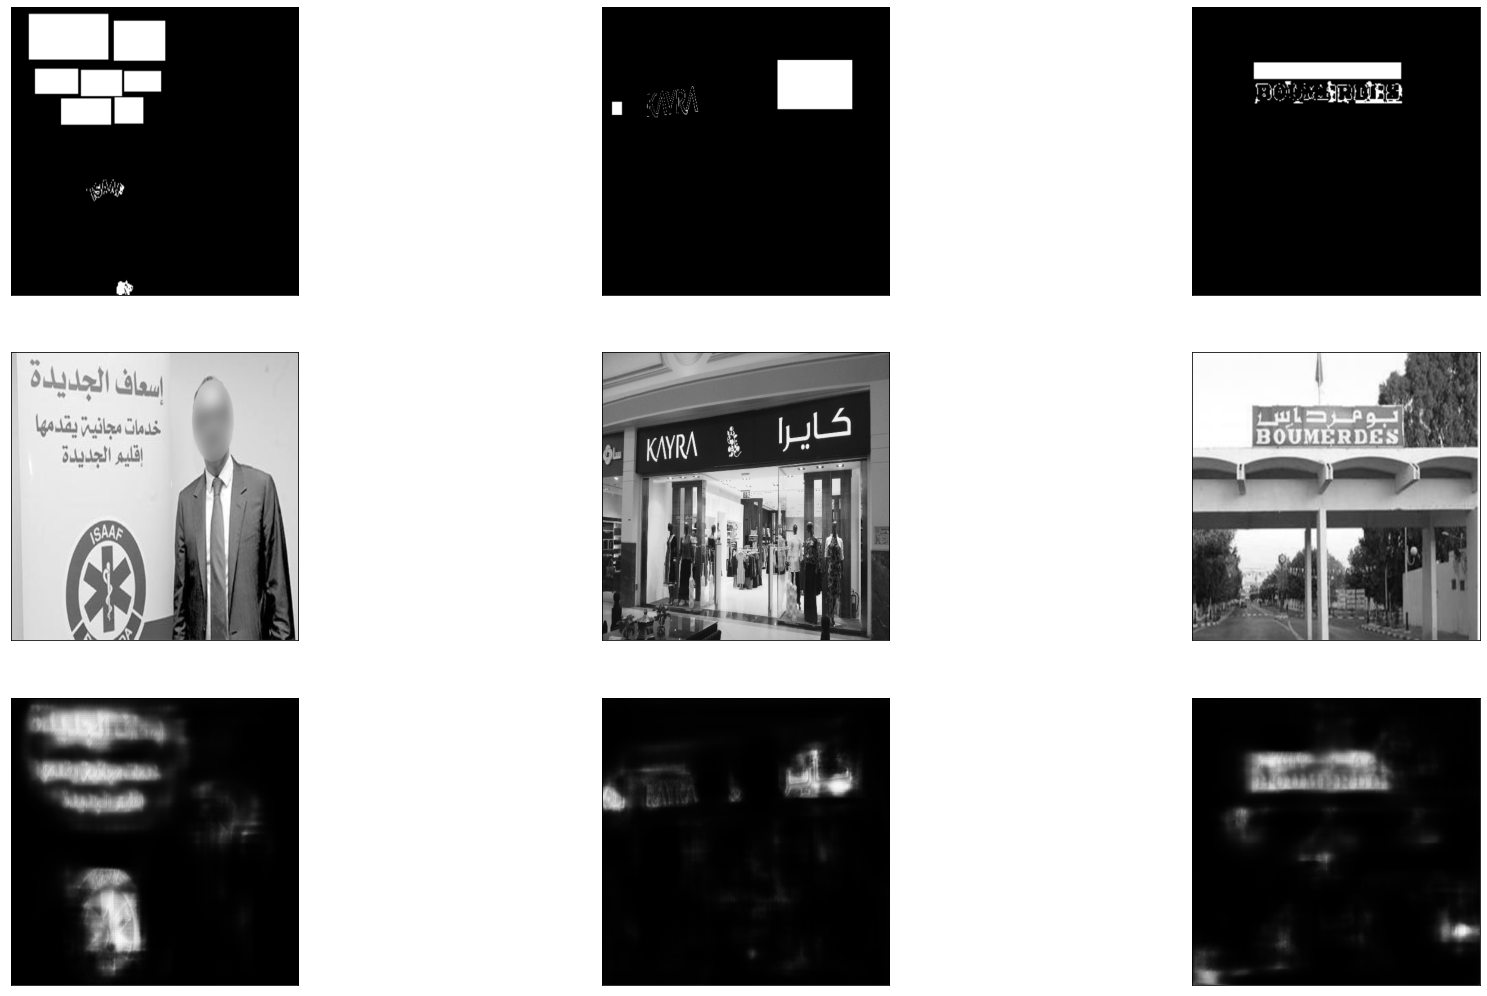

In [14]:
decoded_imgs = autoencoder.predict(test_x) 
x = 1
n = 3
plt.figure(figsize=(30, 18))
for i in range(x,n+x):
     
    ax = plt.subplot(3, n, i)
    plt.imshow(test_y[i-1].reshape(IMG_WIDTH,IMG_WIDTH))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    
    ax = plt.subplot(3, n, i+n)
    plt.imshow(test_x[i-1].reshape(IMG_WIDTH,IMG_WIDTH))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i-1].reshape(IMG_WIDTH,IMG_WIDTH))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
  
my_dir = listdir('/content/drive/MyDrive/Colab_Notebooks/Zdjecia2/')
temp = list()
 
my_test = []

for file in my_dir:  
    path1 = path.join('/content/drive/MyDrive/Colab_Notebooks/Zdjecia2/', str(file)) 
    img = cv2.resize(cv2.imread(path1,0),(IMG_WIDTH,IMG_WIDTH)) 
    my_test.append(img)
 
my_test = np.array(my_test)  
my_x = my_test.reshape((-1, IMG_WIDTH,IMG_WIDTH, 1)) 
my_x = my_x/255  
del my_test 

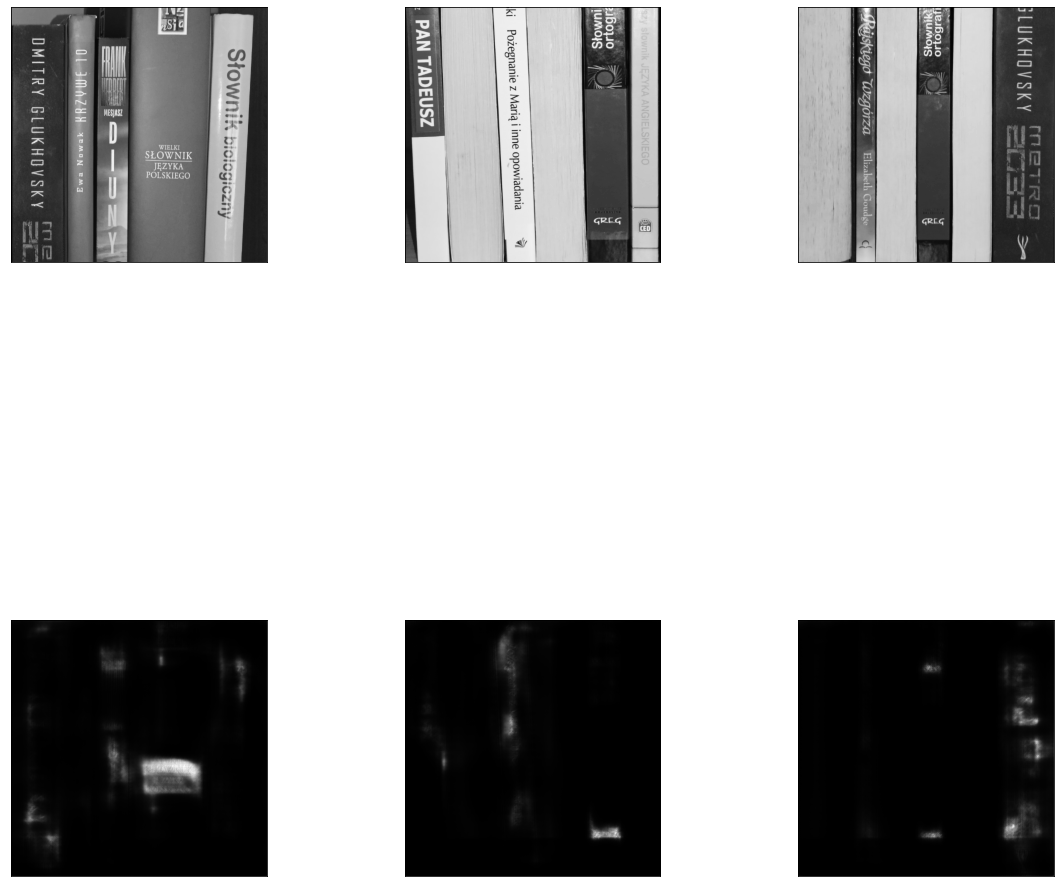

In [20]:
decoded_imgs = autoencoder.predict(my_x) 
x=1
n = 3
plt.figure(figsize=(20, 16))
for i in range(x,n+x):  
    ax = plt.subplot(3, n, i )
    plt.imshow(my_x[i-1].reshape(IMG_WIDTH,IMG_WIDTH ))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n,  i + 2*n )
    plt.imshow(decoded_imgs[i-1].reshape(IMG_WIDTH,IMG_WIDTH))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() 